<a href="https://colab.research.google.com/github/JuanCReyes1/GeospatialDataAnalysis/blob/main/MathematicalModelingwSklearn_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GDAA 2010 Data Mining Modeling

## Assignment 1: Predictive Analytics with a Continuous Target

## For: Dr. Steven Edwards

## By Rachel Thevernard and Juan C. Reyes

### Python Version: 3.10.2

The dataset chosen was a collection of demographic and spending data pertaining to 6,588 Dissemination Areas (DA's) making up the Greater Montreal area. The DA's were downloaded from Statistics Canada and clipped to the Greater Montreal area using ArcGIS Pro. ArcGIS Pro's Business Analyst extension was used to enrich the layer with 2021 demographic and spending data. 

Greater Montreal is Quebec's most populous metropolitan area. It is the second most populous metropolitan area in Canada, after the Greater Toronto Area. 

The target variable of choice was "Pop Single (Never Married): Percent", consisting of the percentage of the population in each dissemination area who have never married or lived in a common-law relationship. 

The data projection is NAD 1983 Lambert Conformal Conic. 

---



## **Note: This notebook is presented in a Colab environemt for illustrative purposes only. Do not run cells in this notebook. Colab is not equipped to run packages such as Geopandas. **

---



# Part A
## Importing Data and Data Cleaning

First we proceed by importing the necessary libraries for performing our data science workflow,

In [ ]:
!pip install geopandas
!pip install folium matplotlib mapclassify
!pip install seaborn
!pip install plotly

     |████████████████████████████████| 1.0 MB 796 kB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 3.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.5 MB 1.3 MB/s eta 0:00:01    |███████                         | 2.5 MB 310 kB/s eta 0:00:29
     |████████████████████████████████| 7.7 MB 477 kB/s eta 0:00:01     |██████████████████████████▍     | 6.3 MB 657 kB/s eta 0:00:03     |███████████████████████████████▏| 7.5 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 411 kB/s eta 0:00:01
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
     |████████████████████████████████| 60 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 909 kB/s eta 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     |██

In [ ]:
#conda install -c conda-forge contextily

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import scipy as sp
import geopandas as gpd
import folium
import mapclassify
import contextily as cx

We read our data from a csv into python using pandas. ** We should talk a bit about our data here** 

In [ ]:
df = pd.read_csv("A1data_cleaned.csv")

Now that our data has been imported, let's take a look at the first ten rows and inspect its contents.

In [ ]:
df.head(20)

OBJECTID     DAUID              DGUID  LANDAREA  PRUID  \
0          1  24520101  2021S051224520101    3.9586     24   
1          2  24520102  2021S051224520102    0.1902     24   
2          3  24520103  2021S051224520103    0.1355     24   
3          4  24520104  2021S051224520104    0.2882     24   
4          5  24520105  2021S051224520105    0.2292     24   
5          6  24520106  2021S051224520106    0.2915     24   
6          7  24520107  2021S051224520107    0.2873     24   
7          8  24520108  2021S051224520108    0.5473     24   
8          9  24520109  2021S051224520109    0.3115     24   
9         10  24520110  2021S051224520110    0.7806     24   
10        11  24520111  2021S051224520111    0.1939     24   
11        12  24520112  2021S051224520112    1.9319     24   
12        13  24520113  2021S051224520113   20.8775     24   
13        14  24520114  2021S051224520114    0.5046     24   
14        15  24520115  2021S051224520115   10.6648     24   
15        16  24520116  2021S051224520116   24.5257     24   
16        17  24520117  2021S051224520117    2.5016     24   
17        18  24550061  2021S051224550061   25.4393     24   
18        19  24550075  2021S051224550075    5.3599     24   
19        20  24550076  2021S051224550076   18.3839     24   

                                    aggregationMethod  HasData  ORIGINAL_OID  \
0   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             1   
1   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             2   
2   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             3   
3   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             4   
4   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             5   
5   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             6   
6   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             7   
7   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             8   
8   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1             9   
9   BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            10   
10  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            11   
11  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            12   
12  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            13   
13  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            14   
14  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            15   
15  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            16   
16  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            17   
17  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        0            18   
18  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            19   
19  BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...        1            20   

   sourceCountry  2021 HHs Exp:Tot Expenditure  ...  2021 Transportation  \
0             CA                   40928709.18  ...           4749710.86   
1             CA                   24443582.94  ...           3294726.05   
2             CA                   17832985.34  ...           2227968.68   
3             CA                   36494744.41  ...           4818461.91   
4             CA                   22710887.83  ...           2773391.47   
5             CA                   17789677.04  ...           2106170.73   
6             CA                   32606882.52  ...           3799103.78   
7             CA                   30137122.48  ...           4254689.14   
8             CA                   25925357.45  ...           3356023.07   
9             CA                   33772306.37  ...           3908764.61   
10            CA                   15328433.07  ...           1800760.01   
11            CA                   64265686.77  ...           8450594.46   
12            CA                

As we can see, we have 64 columns and 6588 rows containing Canadian demographic information.

In [ ]:
df.shape

(6588, 64)

The names of the columns and the information they contain can be accessed using the following command.

In [ ]:
df.columns

Index(['OBJECTID', 'DAUID', 'DGUID', 'LANDAREA', 'PRUID', 'aggregationMethod',
       'HasData', 'ORIGINAL_OID', 'sourceCountry',
       '2021 HHs Exp:Tot Expenditure', '2021 Health Care',
       '2021 HHs Exp:Tot Cur Consumptn', '2021 Male Median Age',
       '2021 Total Pop Median Age', '2021 Female Median Age',
       '2021 Total Population', '2026 Total Population',
       '2021 Daytime Pop Total Pop', '2016 HH Type - Total HHs (Census)',
       '2021 HH Type: Total Family HHs', '2026 HH Type: Total Family HHs',
       '2021 Tenure: Total HHs', '2021 Tenure: Owned',
       '2021 Tenure: Owned: Percent', '2021 Tenure: Rented',
       '2021 Tenure: Rented: Percent', '2021 Edu 15+ Above Bachelor',
       '2021 Edu 15+ Above Bachelor: Percent', '2021 Edu 15+ < Bachelor',
       '2021 Edu 15+ < Bachelor: Percent', '2021 Edu 15+ College Dipl',
       '2021 Edu 15+ College Dipl: Percent', '2021 Labour Force HH Pop 15+',
       '2021 Not In the Labour Force', '2021 Not In the Labour Force:

# Map

Let's examine our data in a map. 

In [ ]:
gdf = gpd.read_file('GreaterMTL_DAs.shp')

Text(0.5, 1.0, '2021 Percentage of Population Single (Never Married) in Greater Montreal')

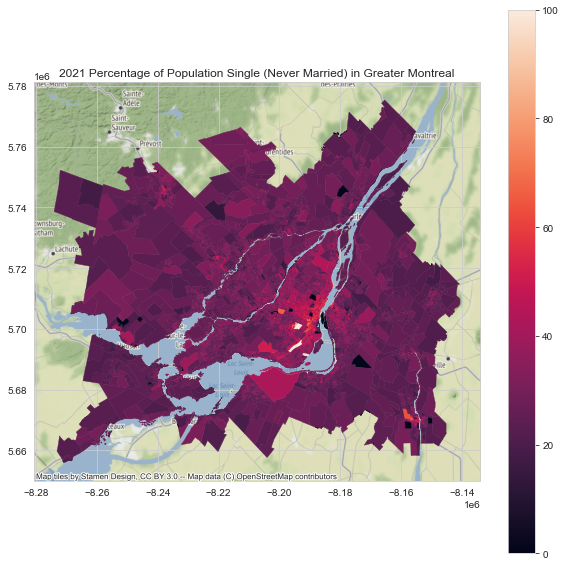

In [ ]:
gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot('maritals_5', figsize=(10,10), legend=True, edgecolor="face", linewidth=0.4)
cx.add_basemap(ax)
ax.set_title('2021 Percentage of Population Single (Never Married) in Greater Montreal')

It appears there are higher proportions of single people concentrated in central Greater Montreal dissemination areas, while the suburbs tend to have fewer single people.  

We can see that some dissemination areas have values of 0; these are likely incorrect values which will be cleaned during our data cleaning process. 

# Data Quality Check

Before subsetting, scaling, or standardizing our data, we first check that no data is missing from the data set and if so, replace them with the mean value $\mu$ of their respective columns.



In [ ]:
# It appears we have no null values
# However, we know from mapping our data that some of our values are zeros.
# We will presume these are null and deal with them in a few steps. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   OBJECTID                                  6588 non-null   int64  
 1   DAUID                                     6588 non-null   int64  
 2   DGUID                                     6588 non-null   object 
 3   LANDAREA                                  6588 non-null   float64
 4   PRUID                                     6588 non-null   int64  
 5   aggregationMethod                         6586 non-null   object 
 6   HasData                                   6588 non-null   int64  
 7   ORIGINAL_OID                              6588 non-null   int64  
 8   sourceCountry                             6586 non-null   object 
 9   2021 HHs Exp:Tot Expenditure              6588 non-null   float64
 10  2021 Health Care                    

In [ ]:
# Drop non-predictor columns, for ease of data cleaning
df = df.drop(['OBJECTID','DAUID','DGUID','LANDAREA','PRUID','aggregationMethod','HasData','ORIGINAL_OID','sourceCountry'], axis=1)

In [ ]:
# Replace zero values with null values
df = df.replace(0, np.nan)

In [ ]:
# Select only rows with null values
df[df.isnull().any(axis=1)]

2021 HHs Exp:Tot Expenditure  2021 Health Care  \
2                      17832985.34         704883.30   
3                      36494744.41        1320479.68   
5                      17789677.04         779206.19   
6                      32606882.52        1430235.22   
8                      25925357.45        1041761.39   
...                            ...               ...   
6578                   19576658.84         739356.70   
6580                   44657739.62        1957526.76   
6583                           NaN               NaN   
6586                           NaN               NaN   
6587                           NaN               NaN   

      2021 HHs Exp:Tot Cur Consumptn  2021 Male Median Age  \
2                        12260895.59                  38.6   
3                        24982028.53                  38.5   
5                        13311510.96                  40.5   
6                        23732521.10                  39.6   
8                        18658192.15                  41.5   
...                              ...                   ...   
6578                     13350517.03                  36.6   
6580                     31253549.06                  40.0   
6583                             NaN                   NaN   
6586                             NaN                   NaN   
6587                             NaN                   NaN   

      2021 Total Pop Median Age  2021 Female Median Age  \
2                          39.2                    40.0   
3                          38.7                    38.8   
5                          43.1                    46.0   
6                          40.4                    41.3   
8                          42.4                    43.5   
...                         ...                     ...   
6578                       37.2                    38.1   
6580                       39.4                    38.8   
6583                        NaN                     NaN   
6586                        NaN                     NaN   
6587                        NaN                     NaN   

      2021 Total Population  2026 Total Population  \
2                     454.0                  457.0   
3                     905.0                  907.0   
5                     512.0                  510.0   
6                     890.0                  897.0   
8                     781.0                  788.0   
...                     ...                    ...   
6578                  456.0                  535.0   
6580                 1131.0                 1256.0   
6583                    NaN                    NaN   
6586                    NaN                    NaN   
6587                    NaN                    NaN   

      2021 Daytime Pop Total Pop  2016 HH Type - Total HHs (Census)  ...  \
2                          265.0                              161.0  ...   
3                          531.0                              300.0  ...   
5                          400.0                              222.0  ...   
6                          694.0                              374.0  ...   
8                          590.0                              281.0  ...   
...                          ...                                ...  ...   
6578                       464.0                              134.0  ...   
6580                       752.0                              372.0  ...   
6583                         NaN                                NaN  ...   
6586                         NaN                                NaN  ...   
6587                         NaN                                NaN  ...   

      2021 Transportation  2021 Transportation: Percent  \
2              2227968.68                         12.49   
3              4818461.91                         13.20   
5              2106170.73                         11.84   
6              3799103.78                         11.65   
8              3356023

In [ ]:
# Fill missing values with mean values of each column
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
# Check that missing values are now gone
# All values are now non-null
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [2021 HHs Exp:Tot Expenditure, 2021 Health Care, 2021 HHs Exp:Tot Cur Consumptn, 2021 Male Median Age, 2021 Total Pop Median Age, 2021 Female Median Age, 2021 Total Population, 2026 Total Population, 2021 Daytime Pop Total Pop, 2016 HH Type - Total HHs (Census), 2021 HH Type: Total Family HHs, 2026 HH Type: Total Family HHs, 2021 Tenure: Total HHs, 2021 Tenure: Owned, 2021 Tenure: Owned: Percent, 2021 Tenure: Rented, 2021 Tenure: Rented: Percent, 2021 Edu 15+ Above Bachelor, 2021 Edu 15+ Above Bachelor: Percent, 2021 Edu 15+ < Bachelor, 2021 Edu 15+ < Bachelor: Percent, 2021 Edu 15+ College Dipl, 2021 Edu 15+ College Dipl: Percent, 2021 Labour Force HH Pop 15+, 2021 Not In the Labour Force, 2021 Not In the Labour Force: Percent, 2021 Occ: HH Pop 15+, 2021 Pop Married or Common-Law, 2021 Pop Married or Common-Law: Percent, 2021 Pop Living Common Law, 2021 Pop Living Common Law: Percent, 2021 Pop Single (Never Married), 2021 Pop Single (Never Married): Percent, 2021 OL: English Only, 2021 OL: English Only: Percent, 2021 MT: English, 2021 MT: English: Percent, 2021 MT: French, 2021 MT: French: Percent, 2021 Total PRIZM HHs, 2021 Total PRIZM POP, 2021 Dom PRIZM Number, 2021 Total Population.1, 2021 Daytime Pop Total Pop.1, 2021 HH Inc: Median Curr$, 2021 Transportation, 2021 Transportation: Percent, 2021 Tot Charitable Contrib, 2021 Goods/Svcs: Internet, 2021 Lawn/Snow/Garbage Removal, 2021 Pet Expenses, 2021 Food Purch From Restaurants, 2021 Food Purch From Stores, Shape_Length, Shape_Area]
Index: []

[0 rows x 55 columns]

As we can see, our dataframe is now clean and complete with no missing entries.

Next, we prepare for mathematical modeling by selecting a subset of this data which is ammenable for the prediction of a continuous target variable. We are interested in predicting the demographic population in 2021 which identify as single (never married). We will attempt to do this from a selection of 15 columns which serve as predictor variables for this task. 

We proceed by creating new dataframes X,Y which contain predictor variables and target variables respectively.

In [ ]:
# Predictor variables
X = df[['2021 MT: French: Percent',
          '2021 Goods/Svcs: Internet',
          '2021 Pet Expenses',
          '2021 Food Purch From Stores',
          '2021 Food Purch From Restaurants',
          '2021 OL: English Only',
          '2021 Pop Married or Common-Law',
          '2021 Edu 15+ College Dipl',
          '2021 Tenure: Owned',
          '2021 Tenure: Rented',
          '2021 Total Pop Median Age',
          '2021 HH Inc: Median Curr$',
          '2021 Lawn/Snow/Garbage Removal',
          '2021 Tot Charitable Contrib',
          '2021 Not In the Labour Force'
          ]]

#Target Variables

##We will only predict one column, but we can store both columns here for organizational purposes.

#Convert the population to a decimal percentage value ([0-1]). 
y = df['2021 Pop Single (Never Married): Percent']/100

#It may be useful to have a complete dataframe with both the predictors and target variables together.
X_complete = X.assign(Pop_Single_Never_MarriedPercent_Target = y)

Let's take a look at our subsetted data,

In [ ]:
X_complete

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
0                    97.160000              259692.980000      230003.980000   
1                    97.320000              194574.970000      157908.200000   
2                    95.590000              109902.220000      103585.430000   
3                    98.560000              311271.170000      198084.480000   
4                    96.550000              141014.080000      136061.060000   
...                        ...                        ...                ...   
6583                 65.551623              272586.467078      131198.118507   
6584                 77.400000              354080.710000      298479.500000   
6585                 78.850000              320312.230000      279529.380000   
6586                 65.551623              272586.467078      131198.118507   
6587                 65.551623              272586.467078      131198.118507   

      2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
0                    3.235065e+06                      1.684294e+06   
1                    2.299650e+06                      9.820418e+05   
2                    1.615943e+06                      7.831508e+05   
3                    3.103805e+06                      1.398574e+06   
4                    2.025841e+06                      9.874583e+05   
...                           ...                               ...   
6583                 2.332643e+06                      1.031821e+06   
6584                 4.100345e+06                      1.297654e+06   
6585                 3.971237e+06                      1.198947e+06   
6586                 2.332643e+06                      1.031821e+06   
6587                 2.332643e+06                      1.031821e+06   

      2021 OL: English Only  2021 Pop Married or Common-Law  \
0                  6.000000                      466.000000   
1                  1.000000                      325.000000   
2                 53.092236                      250.000000   
3                 53.092236                      480.000000   
4                  2.000000                      295.000000   
...                     ...                             ...   
6583              53.092236                      294.959149   
6584              74.000000                      599.000000   
6585              38.000000                      592.000000   
6586              53.092236                      294.959149   
6587              53.092236                      294.959149   

      2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
0                    116.000000          291.000000            37.000000   
1                    104.000000          211.000000            13.000000   
2                     64.000000          141.000000            15.000000   
3                    108.000000          306.000000           137.111494   
4                     73.000000          184.000000            30.000000   
...                         ...                 ...                  ...   
6583                  99.116692          160.257387           137.111494   
6584                 192.000000          412.000000            51.000000   
6585                  97.000000          433.000000            60.000000   
6586                  99.116692          160.257387           137.111494   
6587                  99.116692          160.257387           137.111494   

      2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
0                     46.200000               95909.090000   
1                     40.500000               96363.640000   
2                     39.200000              100000.000000   
3                     38.700000               97049.180000   
4                     41.800000               92903.230000   
...                         ...                        ...   
6583                  42.311222               84765.537422   
6584                  54.0

The size of our predictor variable matrix $X$,

In [ ]:
print("The total number of predictor columns: " + str(X.columns.size))
print("The total number of rows in our dataset: "+str(len(X)))

The total number of predictor columns: 15
The total number of rows in our dataset: 6588


and our target column $y$,

In [ ]:
y

0       0.219200
1       0.253100
2       0.248600
3       0.266900
4       0.289400
          ...   
6583    0.325998
6584    0.177800
6585    0.227800
6586    0.325998
6587    0.325998
Name: 2021 Pop Single (Never Married): Percent, Length: 6588, dtype: float64

# Scaling and Normalizing Data
https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

Now we demonstrate min/max scaling of the input data as well as Z- score transforming our data. It is a very useful transformation which places the every value in the range of [0,1]. This however makes our transformed data quite suceptible to outliers skewing the results for the entire distribution. The distribution is computed as follows,

$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$


In [ ]:
# Code from here: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
def min_max_scaling(df):
  normalized_df = df.copy()
  for col in normalized_df.columns:
    normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())
  return normalized_df 

X_norm_df = min_max_scaling(X)


X_complete_norm = min_max_scaling(X_complete)

X_norm_df.head()

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
0                  0.970821                   0.040677           0.100165   
1                  0.972465                   0.030460           0.068724   
2                  0.954690                   0.017176           0.045034   
3                  0.985205                   0.048769           0.086245   
4                  0.964554                   0.022057           0.059197   

   2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
0                     0.101044                          0.090244   
1                     0.071765                          0.052583   
2                     0.050364                          0.041917   
3                     0.096935                          0.074922   
4                     0.063194                          0.052874   

   2021 OL: English Only  2021 Pop Married or Common-Law  \
0               0.003081                        0.139934   
1               0.000000                        0.097502   
2               0.032096                        0.074932   
3               0.032096                        0.144147   
4               0.000616                        0.088474   

   2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
0                   0.101322            0.136599             0.022872   
1                   0.090749            0.098917             0.007624   
2                   0.055507            0.065944             0.008895   
3                   0.094273            0.143665             0.086475   
4                   0.063436            0.086199             0.018424   

   2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
0                   0.428161                   0.272524   
1                   0.346264                   0.274144   
2                   0.327586                   0.287106   
3                   0.320402                   0.276588   
4                   0.364943                   0.261810   

   2021 Lawn/Snow/Garbage Removal  2021 Tot Charitable Contrib  \
0                        0.029513                     0.002997   
1                        0.019696                     0.001692   
2                        0.016454                     0.000997   
3                        0.021922                     0.002288   
4                        0.020488                     0.001117   

   2021 Not In the Labour Force  
0                      0.078857  
1                      0.046832  
2                      0.027548  
3                      0.066460  
4                      0.064738

For the purposes of this exercise, we will choose to standardize each column by subtracting the mean $\mu$ from each of its values, and dividing by the standard deviation $\sigma$ of the distribution. This often leads to the resulting distribution $x_{std}$ to result in the range (-3,3) given that this is where 99% of values lie for normal distributions. The z-score transformation can be calculated for each column as follows given their respective mean $\mu$ and standard deviation $\sigma$.

$X_{std} = \frac{X-\mu}{\sigma}$

For visualization and pedagogical purposes we create our own function to standardize a pandas data frame. For numerical computation purposes we will be importing the StandardScaler() function from the sklearn.preprocessing library to scale our data, as well as convert to a useful numpy array.

In [ ]:
def std_dataframe(X):
  standardized_df = (X - X.mean()) / X.std()

  return standardized_df

X_complete_std_df = std_dataframe(X)

X_complete_std_df

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
0                     1.254109              -3.813853e-02           0.719881   
1                     1.260458              -2.307555e-01           0.194605   
2                     1.191817              -4.812148e-01          -0.201181   
3                     1.309656               1.144281e-01           0.487322   
4                     1.229907              -3.891870e-01           0.035430   
...                        ...                        ...                ...   
6583                  0.000000               1.721764e-16           0.000000   
6584                  0.470102               2.410574e-01           1.218781   
6585                  0.527633               1.411713e-01           1.080714   
6586                  0.000000               1.721764e-16           0.000000   
6587                  0.000000               1.721764e-16           0.000000   

      2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
0                    5.009014e-01                      6.949101e-01   
1                   -1.831294e-02                     -5.301723e-02   
2                   -3.978137e-01                     -2.648444e-01   
3                    4.280438e-01                      3.906065e-01   
4                   -1.702947e-01                     -4.724844e-02   
...                           ...                               ...   
6583                 2.584716e-16                      1.239871e-16   
6584                 9.811872e-01                      2.831228e-01   
6585                 9.095239e-01                      1.779954e-01   
6586                 2.584716e-16                      1.239871e-16   
6587                 2.584716e-16                      1.239871e-16   

      2021 OL: English Only  2021 Pop Married or Common-Law  \
0                 -0.608199                        0.784503   
1                 -0.672774                        0.137787   
2                  0.000000                       -0.206211   
3                  0.000000                        0.848716   
4                 -0.659859                        0.000187   
...                     ...                             ...   
6583               0.000000                        0.000000   
6584               0.270025                        1.394526   
6585              -0.194917                        1.362419   
6586               0.000000                        0.000000   
6587               0.000000                        0.000000   

      2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
0                  2.391761e-01            0.895970            -0.875008   
1                  6.917901e-02            0.347735            -1.084776   
2                 -4.974780e-01           -0.131969            -1.067295   
3                  1.258447e-01            0.998763             0.000000   
4                 -3.699801e-01            0.162706            -0.936190   
...                         ...                 ...                  ...   
6583               2.013170e-16            0.000000             0.000000   
6584               1.315824e+00            1.725174            -0.752643   
6585              -2.998596e-02            1.869085            -0.673980   
6586               2.013170e-16            0.000000             0.000000   
6587               2.013170e-16            0.000000             0.000000   

      2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
0                  5.563988e-01                   0.278718   
1                 -2.591460e-01                   0.290087   
2                 -4.451475e-01                   0.381038   
3                 -5.166865e-01                   0.307233   
4                 -7.314457e-02                   0.203536   
...                         ...                        ...   
6583              -1.016631e-15                   0.000000   
6584               1.67240

In [ ]:
X_complete_std_df.max()

2021 MT: French: Percent             1.366791
2021 Goods/Svcs: Internet           18.048560
2021 Pet Expenses                   15.753446
2021 Food Purch From Stores         16.442446
2021 Food Purch From Restaurants    18.762150
2021 OL: English Only               20.288363
2021 Pop Married or Common-Law      13.893119
2021 Edu 15+ College Dipl           14.688929
2021 Tenure: Owned                  13.457384
2021 Tenure: Rented                 12.567625
2021 Total Pop Median Age            6.250905
2021 HH Inc: Median Curr$            5.383373
2021 Lawn/Snow/Garbage Removal      37.299862
2021 Tot Charitable Contrib         39.341058
2021 Not In the Labour Force        23.354221
dtype: float64

In [ ]:
X_complete_std_df.min()

2021 MT: French: Percent           -2.494922
2021 Goods/Svcs: Internet          -0.805042
2021 Pet Expenses                  -0.953570
2021 Food Purch From Stores        -1.290943
2021 Food Purch From Restaurants   -1.097295
2021 OL: English Only              -0.672774
2021 Pop Married or Common-Law     -1.348285
2021 Edu 15+ College Dipl          -1.389963
2021 Tenure: Owned                 -1.091379
2021 Tenure: Rented                -1.189660
2021 Total Pop Median Age          -3.707327
2021 HH Inc: Median Curr$          -1.633565
2021 Lawn/Snow/Garbage Removal     -0.567384
2021 Tot Charitable Contrib        -0.299887
2021 Not In the Labour Force       -1.523860
dtype: float64

Now we can do the same with the sklearn function StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

As we can see the shape of our distribution is retained, with 6588 total rows, and 15 predictor columns.

In [ ]:
X_scaled.shape

(6588, 15)

By printing the results, we can see that our data is in a numpy array.

In [ ]:
X_scaled

array([[ 1.25420460e+00, -3.81414210e-02,  7.19935920e-01, ...,
         5.50215191e-01, -1.81080058e-01,  4.37978148e-01],
       [ 1.26055332e+00, -2.30773051e-01,  1.94619497e-01, ...,
         1.78467105e-01, -2.32817582e-01, -3.58797731e-01],
       [ 1.19190778e+00, -4.81251373e-01, -2.01196225e-01, ...,
         5.56851885e-02, -2.60395297e-01, -8.38576755e-01],
       ...,
       [ 5.27672960e-01,  1.41182010e-01,  1.08079624e+00, ...,
         5.28941357e-01,  1.17091432e-01,  2.00582746e+00],
       [ 0.00000000e+00,  1.72189485e-16,  0.00000000e+00, ...,
        -1.05019720e-16,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.72189485e-16,  0.00000000e+00, ...,
        -1.05019720e-16,  0.00000000e+00,  0.00000000e+00]])

# Exploratory Data Analysis

We look at a heatmap of the correlation between variables, this gives an idea of which variables exhibit correlations among them.

Text(0.5, 1.0, 'Correlation Heatmap')

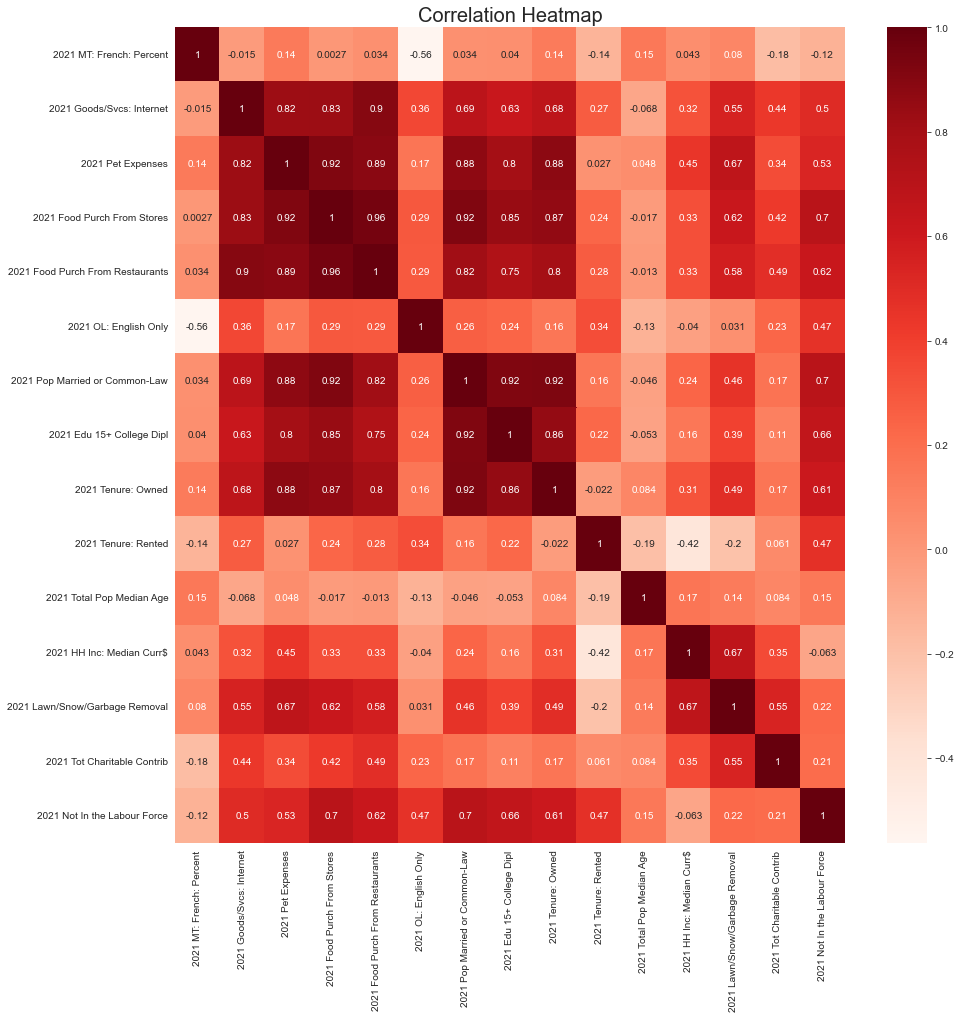

In [ ]:
# see correlation between variables through a correlation heatmap
corr = X_complete_std_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

# Predicting Target Variable: 2021 Single Population

The population percentage of single people for 2021 (target variable) are stored in the following pandas series array.


In [ ]:
y

0       0.219200
1       0.253100
2       0.248600
3       0.266900
4       0.289400
          ...   
6583    0.325998
6584    0.177800
6585    0.227800
6586    0.325998
6587    0.325998
Name: 2021 Pop Single (Never Married): Percent, Length: 6588, dtype: float64

# Creating Training and Test Data

We wish to create a mathematical classification model which can serve as a tool for the future prediction of new data, based on any current data we possess. For the "model training" process, we will intentially hold back a randomly chosen subset of our data from the model refinement process. This allows us to use the retained data set to mimick new unseen data, and further make predictions from the trained model. This choice allows the analyst to determine how well the classifier is performing by comparing the predictions from the trained model to those of the test set's 'ground truth' target variables. Each time the classification model is calibrated (trained), a particular set of parameter values are stored and further applied the next time the model is asked to make a prediction. The central aim for the analyst is thus to select the best combination of parameter values to minimize the number of prediction errors on our training and test data sets, as well as any consequent data which may be presented. To aid the analyst in quantifying the error produced by the model, *loss functions* can be applied not only to report how accurate measurements were devised by the algorithm but also serve as a tool for indicating how much the parameters in the model should be altered in order to minimize the model error, as in the case of stochastic gradient descent.  

We proceed by importing the train_test_split function from sklearn which allows us to create four pandas data frames each containing our training and test set's predictor and target variables. 

We device our test set to randomly select and retain $30$% of rows from the complete data set.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set for normalized data
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm_df, y, test_size=0.3,random_state=42) # 70% training and 30% test sets

# Split dataset into training set and test set for standardized data
X_std_train, X_std_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42) # 70% training and 30% test sets



In [ ]:
print("Normalized Data: ")
print("The shape of our training prediction set is: " + str(X_norm_train.shape))
print("The shape of our test prediction set is: " + str(X_norm_test.shape))
print("The shape of our training target set is: " + str(y_norm_train.shape))
print("The shape of our test target set is: " + str(y_norm_test.shape))


print("Standardized Data: ")
print("The shape of our training prediction set is: " + str(X_std_train.shape))
print("The shape of our test prediction set is: " + str(X_std_test.shape))
print("The shape of our training target set is: " + str(y_train.shape))
print("The shape of our test target set is: " + str(y_test.shape))


Normalized Data: 
The shape of our training prediction set is: (4611, 15)
The shape of our test prediction set is: (1977, 15)
The shape of our training target set is: (4611,)
The shape of our test target set is: (1977,)
Standardized Data: 
The shape of our training prediction set is: (4611, 15)
The shape of our test prediction set is: (1977, 15)
The shape of our training target set is: (4611,)
The shape of our test target set is: (1977,)


# Neural Network in Sklearn

In the following section we implement a multo-layer perceptron (MLP) regressor using te sklearn library (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

From the sklearn.neural_network library we import the MLPRegressor() function which allows us to create a multi-layer perceptron by simply entering a few parameters to characterize the network.

A MLP regressor is a type of artificial neural network (ANN) which consists of at least three layers of neurons: an input layer (input data), a hidden layer (abstraction layer) and an output layer (classification or regression). We will be creating artificial neural networks with varying numbers of hidden layers, in addition to varying numbers of neurons in the hidden layers. For a neural network with N hidden layers, the total number of layers for the network will be N+2 (hidden layers, input layers, output layers).




In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
#Import time module to keep track of how long the algorithm is running for.
import time


In [ ]:
neuron_arr = []
num_layers = 5
num_neurons = [64,128,256,512]

for i in range(len(num_neurons)):

    #For time-keeping purposes
  t = time.localtime()
  current_time = time.strftime("%H:%M:%S", t)
  print(current_time)

  a = [num_neurons[i]]
  
  #here we can control the range of total number of hidden layers to include
  for layer in range(3,num_layers+1):

    print("Training a Neural Network with " + str(num_neurons[i])+" neurons in each of " + str(layer)+ " hidden layer(s).")

    reg = MLPRegressor(hidden_layer_sizes=a, activation="relu" ,solver="adam",random_state=1, max_iter=2000).fit(X_std_train, y_train)
    
    a.append(num_neurons[i])

    y_pred=reg.predict(X_std_test)
    print("The Score with " + str(num_neurons[i])+" neurons in each of " + str(layer)+ " hidden layer(s) yields: ", (r2_score(y_pred, y_test)))

    neuron_arr.append([num_neurons[i], layer, r2_score(y_pred, y_test)])



19:04:30
Training a Neural Network with 64 neurons in each of 3 hidden layer(s).
The Score with 64 neurons in each of 3 hidden layer(s) yields:  0.4740557614903923
Training a Neural Network with 64 neurons in each of 4 hidden layer(s).
The Score with 64 neurons in each of 4 hidden layer(s) yields:  0.6363848352479227
Training a Neural Network with 64 neurons in each of 5 hidden layer(s).
The Score with 64 neurons in each of 5 hidden layer(s) yields:  0.6201574767184757
19:04:32
Training a Neural Network with 128 neurons in each of 3 hidden layer(s).
The Score with 128 neurons in each of 3 hidden layer(s) yields:  0.5736858893371075
Training a Neural Network with 128 neurons in each of 4 hidden layer(s).
The Score with 128 neurons in each of 4 hidden layer(s) yields:  0.7039282317887721
Training a Neural Network with 128 neurons in each of 5 hidden layer(s).
The Score with 128 neurons in each of 5 hidden layer(s) yields:  0.7203603435651371
19:04:34
Training a Neural Network with 256 ne

Neural Network Results:

In [ ]:
neural_cols = ['Num.Neurons','Num.Layers','R2Score']
neural_df = pd.DataFrame(neuron_arr,columns=neural_cols)

neural_df = neural_df.sort_values(by=['R2Score'],ascending=False)
                                    
neural_df.head(10)

Num.Neurons  Num.Layers   R2Score
11          512           5  0.802772
8           256           5  0.775383
10          512           4  0.723889
5           128           5  0.720360
4           128           4  0.703928
6           256           3  0.678829
1            64           4  0.636385
2            64           5  0.620157
3           128           3  0.573686
0            64           3  0.474056

As we can see, our best accuracy $83$% was predicted using a neural network with 9 hidden layers each comprising of 1024 neurons.  

We can now retrain this model in order to save the weight configurations of the neural network and have it available as a tool to make further predictions on new data.

In [ ]:
a = [512,512,512,512,512]
reg = MLPRegressor(hidden_layer_sizes=a, activation="relu" ,solver="adam",random_state=1, max_iter=2000).fit(X_std_train, y_train)

In [ ]:
y_pred=reg.predict(X_std_test)
print("The Score with " + str(a[0])+" neurons in each of " + str(len(a))+ " hidden layer(s) yields: ", (r2_score(y_pred, y_test)))


The Score with 512 neurons in each of 5 hidden layer(s) yields:  0.8176570906154211


# Linear Regression

## Ordinary Least Squares

The theory of Linear Regression is based on the mathematics of combining observations under similar conditions.  

LinearRegression in SciKit-Learn fits a linear model with coefficients *w* that minimize the residual sum of squares between the targets observed in the dataset, and the predicted targets by the linear approximation. 

The estimates for coefficients are dependent on the independence of features. Correlated features result in an approximately linear dependence between the columns of the predictor values (also known as the design matrix X). This results in the design matrix becoming close to singular, and a large variance is produced from the least squares estimate becoming highly sensitive to random errors in the observed target. 

The model parameters are described in the documentation: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [ ]:
#import the sklearn Linear Regression Library
from sklearn.linear_model import LinearRegression

In [ ]:
# starting with just the default parameters
model = LinearRegression()

We will test our Linear Regression model on both the normalized and the standardized data, to examine how feature scaling affects our results. 

## Linear Regression on Normalized Data

In [ ]:
# Linear Regression on Normalized Data
# X_norm_train, X_norm_test, y_norm_train, y_norm_test
# Start by calling our Linear Regression model on our training data
model.fit(X_norm_train, y_norm_train)

# Next we can use our trained model to predict results based on a set of test data
test_predictions = model.predict(X_norm_test)


In [ ]:
# Evaluate performance of linear regression on normalized data
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate mean absolute error
MAE = mean_absolute_error(y_norm_test, test_predictions)
# Calculate root mean squared error
MSE = mean_squared_error(y_norm_test, test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
# Average value of Single Population
target_mean = y.mean()
target_mean

0.3259978739675742

<AxesSubplot:xlabel='2021 Pop Single (Never Married): Percent', ylabel='Count'>

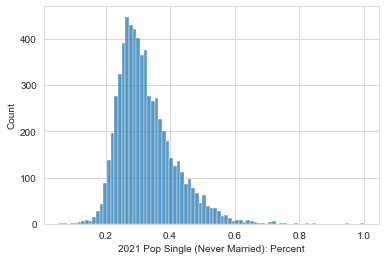

In [ ]:
# Histogram of the range of values of 2021 Pop Single (Never Married)
sns.histplot(data=y)

In [ ]:
print("The mean absolute error (MAE) is {}".format(MAE))
MAE_per = MAE/target_mean * 100
print("The MAE represents {} % of the mean of the target variable.".format(MAE_per))

The mean absolute error (MAE) is 0.037477613958922185
The MAE represents 11.49627557468364 % of the mean of the target variable.


In [ ]:
print("The root mean squared error (RMSE) is {}".format(RMSE))
RMSE_per = RMSE/target_mean * 100
print("The RMSE represents {} % of the mean of the target variable.".format(RMSE_per))

The root mean squared error (RMSE) is 0.05080965647044957
The RMSE represents 15.585885837863906 % of the mean of the target variable.


The MAE performs better than the RMSE. The results of the MAE and the RMSE suggest that the model is performing relatively well for most data points, but a few are way off. 

### Plotting Residuals

We will now plot out the residuals, to help us understand if Linear Regression was a valid model choice. 

In [ ]:
norm_test_residuals = y_norm_test - test_predictions

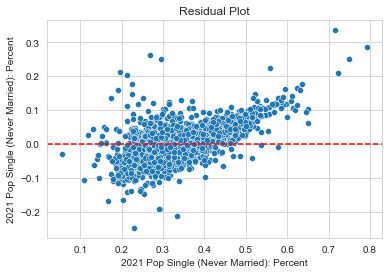

In [ ]:
sns.scatterplot(x=y_norm_test, y=norm_test_residuals).set(title='Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')

The residual plot should be random, with no clear line or curve, and approximately the same number of points above and below zero. It appears our data is clustered, as opposed to random. This suggests that Linear Regression is not an appropriate choice of model. 

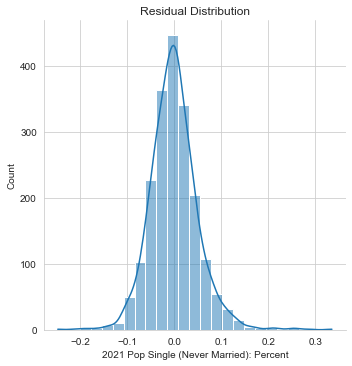

In [ ]:
sns.displot(norm_test_residuals, bins=25, kde=True).set(title='Residual Distribution')

The distribution of our residuals is approximately normal with a mean of 0, which is good. However, the residual plot still suggests our residuals are not random. 

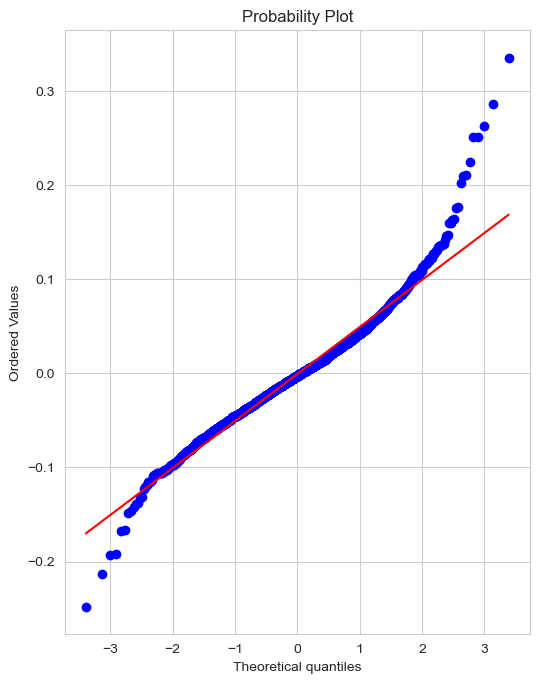

In [ ]:
# Probability plot
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(norm_test_residuals,plot=ax)

While most of the data fits along the normal distribution line, there are some significant outliers. This suggests there are issues with the dataset for Linear Regression.

### Coefficient Interpretation

In [ ]:
# check model coefficients
model.coef_

array([-0.01323999,  0.17233428,  0.16757988,  0.52267679,  0.22806922,
       -0.11798861, -1.66476547,  0.48735346,  0.03143536,  0.25057514,
       -0.43331422, -0.16413801, -0.06217534, -0.26615619,  0.18225755])

In [ ]:
X.head()

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
0                     97.16                  259692.98          230003.98   
1                     97.32                  194574.97          157908.20   
2                     95.59                  109902.22          103585.43   
3                     98.56                  311271.17          198084.48   
4                     96.55                  141014.08          136061.06   

   2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
0                   3235064.56                        1684293.68   
1                   2299650.20                         982041.77   
2                   1615943.20                         783150.76   
3                   3103804.59                        1398573.69   
4                   2025840.51                         987458.26   

   2021 OL: English Only  2021 Pop Married or Common-Law  \
0               6.000000                           466.0   
1               1.000000                           325.0   
2              53.092236                           250.0   
3              53.092236                           480.0   
4               2.000000                           295.0   

   2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
0                      116.0               291.0            37.000000   
1                      104.0               211.0            13.000000   
2                       64.0               141.0            15.000000   
3                      108.0               306.0           137.111494   
4                       73.0               184.0            30.000000   

   2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
0                       46.2                   95909.09   
1                       40.5                   96363.64   
2                       39.2                  100000.00   
3                       38.7                   97049.18   
4                       41.8                   92903.23   

   2021 Lawn/Snow/Garbage Removal  2021 Tot Charitable Contrib  \
0                       154903.64                     47867.83   
1                       103392.87                     27072.50   
2                        86379.76                     15987.94   
3                       115075.43                     36557.51   
4                       107546.42                     17902.51   

   2021 Not In the Labour Force  
0                         230.0  
1                         137.0  
2                          81.0  
3                         194.0  
4                         189.0

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_predictions, y_norm_test)

0.4965148184662458

In the scenario above, our model predicts that approximately 23% of the population in the new Dissemination Area would be single. We have no way of knowing if this is true, because all of our values are made up. However, considering the mean of all target values is approximately 0.32 (or 32% of the population in an average DA is single), our result is plausible.

## Linear Regression on Standardized Data

In [ ]:
# Linear Regression on Standardized Data
model2 = LinearRegression()
# X_std_train, X_std_test, y_train, y_test
std_model = model2.fit(X_std_train, y_train)

# Use the trained model to predict results based on a set of test data
std_test_predictions = model.predict(X_std_test)

C:\Users\rache\anaconda3\envs\pandas_geopandas\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate performance of linear regression on normalized data
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate mean absolute error
std_MAE = mean_absolute_error(y_norm_test, test_predictions)
# Calculate root mean squared error
std_MSE = mean_squared_error(y_norm_test, test_predictions)
std_RMSE = np.sqrt(std_MSE)

In [ ]:
print("The mean absolute error (MAE) is {}".format(std_MAE))
std_MAE_per = std_MAE/target_mean * 100
print("The MAE represents {} % of the mean of the target variable.".format(std_MAE_per))

The mean absolute error (MAE) is 0.037477613958922185
The MAE represents 11.49627557468364 % of the mean of the target variable.


In [ ]:
print("The root mean squared error (RMSE) is {}".format(std_RMSE))
std_RMSE_per = std_RMSE/target_mean * 100
print("The RMSE represents {} % of the mean of the target variable.".format(std_RMSE_per))

The root mean squared error (RMSE) is 0.05080965647044957
The RMSE represents 15.585885837863906 % of the mean of the target variable.


## Comparing results: normalized vs. standardized data

In [ ]:
print("The MAE for Linear Regression on the normalized data is {}".format(MAE))
print("The MAE for Linear Regression on the standardized data is {}".format(std_MAE))
print("The RMSE for Linear Regression on the normalized data is {}".format(RMSE))
print("The RMSE for Linear Regression on the standardized data is {}".format(std_RMSE))

The MAE for Linear Regression on the normalized data is 0.037477613958922185
The MAE for Linear Regression on the standardized data is 0.037477613958922185
The RMSE for Linear Regression on the normalized data is 0.05080965647044957
The RMSE for Linear Regression on the standardized data is 0.05080965647044957


The numbers are the same; our choice of feature engineering does not affect our results. 

# Support Vector Machines

## Support Vector Regression

Support Vector Machines provide supervised mathematical algorithms which perform classification, regression, and outlier detection tasks.

For the identification of a continuous target variable as in the present problem at hand, we can extend support vector classification techniques to perform Support Vector Regression tasks (https://scikit-learn.org/stable/modules/svm.html#regression). 

https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use

"Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], **or standardize it to have mean 0 and variance 1**. Note that the same scaling must be applied to the test vector to obtain meaningful results."

We begin by creating an array of parameter values which the algorithm will loop through in order to fit a variety of support vector regression classifiers. From these, we will calculate a pearson r correlation parameter to quantify model error to help us determine the best set of parameters for the classification problem at hand. The $R^{2}$ value will also be calculated for comparison to the other models.

The model parameters are described in the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Their context within the mathematical formulation are presented here:
https://scikit-learn.org/stable/modules/svm.html#svr

The first thing that we need to do to run the support vector regression algorithm is to import it from sklearn.

In [ ]:
from sklearn.svm import SVR 
from scipy import stats
#Import time module to keep track of how long the algorithm is running for.
import time
from sklearn.metrics import r2_score


In [ ]:
#This combination of arrays took 18m 1s to run on google's CPU vs 11m17s on Google's CPU.
#Make sure to change the runtime to a GPU
#Runtime -> Change Runtime Type ->GPU
C_array = [0.1, 1, 10,100]
epsilon_array = [1, 0.1, 0.01]

## Hypertuning the SVR model:

For this example we create a SVR with a Radial Basis Function (Gaussian) kernel which is great for regression tasks on multidimensional data.

In [ ]:
hyper_arr = []

#define two loops to each iterate over the established parameter values
for C in C_array:
  for epsilon in epsilon_array:

    #For time-keeping purposes
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

    #update the model parameters in this line
    model = SVR(kernel = 'rbf', C=C, epsilon=epsilon)
    #fit a support vector regression model with the previous parameters, on the specified training data sets.
    svr = model.fit(X_std_train,y_train)
    #After training, generate predictions using the test set data
    y_pred = model.predict(X_std_test)
    #Once predictions have been made, determine error by calculating a pearson correlation with the ground truth data.
    #High correlation implies a high quantity of accurate predictions. We seek to maximize the pearson correlation.
    corr = stats.pearsonr(y_test,y_pred)[0]
    #Append results to an array to compare all parameter values and their correlation once all parameter permutations are exhausted.
    hyper_arr.append([C, epsilon, corr,r2_score(y_pred, y_test)])
    print("Updating parameter values - C=" +str(C)+" epsilon="+str(epsilon)+" correlation="+str(corr)+" R2 Score= "+str(r2_score(y_pred, y_test)))



18:54:17
Updating parameter values - C=0.1 epsilon=1 correlation=nan R2 Score= 0.0
18:54:17
Updating parameter values - C=0.1 epsilon=0.1 correlation=0.8476372985062706 R2 Score= 0.5334807199790298
18:54:17


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=0.1 epsilon=0.01 correlation=0.9041056842669126 R2 Score= 0.7620133479213291
18:54:19
Updating parameter values - C=1 epsilon=1 correlation=nan R2 Score= 0.0
18:54:19
Updating parameter values - C=1 epsilon=0.1 correlation=0.8370127004940952 R2 Score= 0.5947256533093199
18:54:19


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=1 epsilon=0.01 correlation=0.9095371504923334 R2 Score= 0.7897347289205052
18:54:21
Updating parameter values - C=10 epsilon=1 correlation=nan R2 Score= 0.0
18:54:21
Updating parameter values - C=10 epsilon=0.1 correlation=0.8297797216447149 R2 Score= 0.6104879972308105
18:54:21


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=10 epsilon=0.01 correlation=0.9007237909911145 R2 Score= 0.7791198946142658
18:54:29
Updating parameter values - C=100 epsilon=1 correlation=nan R2 Score= 0.0
18:54:29
Updating parameter values - C=100 epsilon=0.1 correlation=0.8295440283996706 R2 Score= 0.6110288691858735
18:54:29


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=100 epsilon=0.01 correlation=0.8501511164703628 R2 Score= 0.694463690634276


## SVR Results:

We present the results for the SVR hyper tuning process and list the parameter values which resulted in the best pearson correlation scores indicating higher accuracy predictions by the regression model.

In [ ]:
hyper_cols = ['c','epsilon','correlation',"R2"]
hyper_df = pd.DataFrame(hyper_arr,columns=hyper_cols)

hyper_df = hyper_df.sort_values(by=['R2'],ascending=False)
                                    
hyper_df

c  epsilon  correlation        R2
5     1.0     0.01     0.909537  0.789735
8    10.0     0.01     0.900724  0.779120
2     0.1     0.01     0.904106  0.762013
11  100.0     0.01     0.850151  0.694464
10  100.0     0.10     0.829544  0.611029
7    10.0     0.10     0.829780  0.610488
4     1.0     0.10     0.837013  0.594726
1     0.1     0.10     0.847637  0.533481
0     0.1     1.00          NaN  0.000000
3     1.0     1.00          NaN  0.000000
6    10.0     1.00          NaN  0.000000
9   100.0     1.00          NaN  0.000000

The best pearson correlation value we obtained was 91% with parameters $C=1.0$ and $\epsilon=0.010$

So lets create a SVR model with presicely those parameter values,

In [ ]:
C=1
epsilon=0.010

model_svr = SVR(kernel='rbf',C=C,epsilon=epsilon) 
svr = model_svr.fit(X_std_train,y_train)

Now we create a new dataframe to store the model with optional parameter values.

In [ ]:
#Initialize an empty dataframe
result_df = pd.DataFrame([],columns=[])
#Create a column which will store the predicted results from the predictor variable test set.
result_df['SVR_Predicted'] = model_svr.predict(X_std_test) 
result_df['Ground_Truths'] = y_test.reset_index(drop=True)
result_df['SVR_Error'] = abs(result_df['Ground_Truths'] - result_df['SVR_Predicted'])

Let's take a look at the worst predictions first by arranging the data by descending maximal error:

In [ ]:
result_df = result_df.sort_values(by=['SVR_Error'],ascending=False)
result_df.head(20)

SVR_Predicted  Ground_Truths  SVR_Error
421        0.317954         0.6490   0.331046
1894       0.408151         0.7143   0.306149
719        0.589645         0.3333   0.256345
1898       0.431632         0.6449   0.213268
1408       0.350013         0.5590   0.208987
1164       0.492309         0.3393   0.153009
1970       0.455422         0.5951   0.139678
240        0.383593         0.5222   0.138607
1021       0.321004         0.1866   0.134404
580        0.239413         0.1084   0.131013
1185       0.323325         0.4477   0.124375
1258       0.288937         0.1674   0.121537
1384       0.240209         0.1194   0.120809
1499       0.339232         0.2206   0.118632
529        0.316331         0.2021   0.114231
1873       0.514522         0.4007   0.113822
1969       0.387290         0.2737   0.113590
1222       0.351619         0.2441   0.107519
1735       0.409520         0.5170   0.107480
1057       0.404734         0.5109   0.106166

Now we can take a look at the most accurate measurements:

In [ ]:
result_df.tail(20)

SVR_Predicted  Ground_Truths  SVR_Error
493        0.257836         0.2582   0.000364
1947       0.308831         0.3085   0.000331
1496       0.423170         0.4235   0.000330
315        0.278114         0.2778   0.000314
196        0.217195         0.2169   0.000295
816        0.339724         0.3400   0.000276
935        0.274751         0.2745   0.000251
1179       0.353264         0.3535   0.000236
1316       0.290334         0.2901   0.000234
97         0.308406         0.3082   0.000206
653        0.359796         0.3596   0.000196
370        0.300591         0.3004   0.000191
1694       0.238353         0.2382   0.000153
1577       0.285345         0.2852   0.000145
1428       0.306834         0.3067   0.000134
536        0.527132         0.5270   0.000132
802        0.391980         0.3921   0.000120
1578       0.230918         0.2310   0.000082
1070       0.266061         0.2661   0.000039
1594       0.255511         0.2555   0.000011

## Let's try this exact same procedure except now we will use the normalized data instead of the standardized data.

In [ ]:
#This combination of arrays took 18m 1s to run on google's CPU vs 11m17s on Google's CPU.
#Make sure to change the runtime to a GPU
#Runtime -> Change Runtime Type ->GPU
C_array = [0.1, 1, 10,100]
epsilon_array = [1, 0.1, 0.01]

In [ ]:
hyper_arr = []

#define two loops to each iterate over the established parameter values
for C in C_array:
  for epsilon in epsilon_array:

    #For time-keeping purposes
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

    #update the model parameters in this line
    model = SVR(kernel = 'rbf', C=C, epsilon=epsilon)
    #fit a support vector regression model with the previous parameters, on the specified training/test sets.
    svr = model.fit(X_norm_train,y_norm_train)
    #After training, generate predictions using the test set data
    y_pred = model.predict(X_norm_test)
    #Once predictions have been made, determine error by calculating a pearson correlation with the ground truth data.
    #High correlation implies a high quantity of accurate predictions. We seek to maximize the pearson correlation.
    corr = stats.pearsonr(y_norm_test,y_pred)[0]
    #Append results to an array to compare all parameter values and their correlation once all parameter permutations are exhausted.
    hyper_arr.append([C, epsilon, corr,r2_score(y_pred, y_test)])
    print("Updating parameter values - C=" +str(C)+" epsilon="+str(epsilon)+" correlation="+str(corr)+" R2 Score= "+str(r2_score(y_pred, y_test)))




18:58:09
Updating parameter values - C=0.1 epsilon=1 correlation=nan R2 Score= 0.0
18:58:09
Updating parameter values - C=0.1 epsilon=0.1 correlation=0.8338308389878766 R2 Score= 0.520141814125898
18:58:09


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=0.1 epsilon=0.01 correlation=0.8859507600499109 R2 Score= 0.6927058631881895
18:58:10
Updating parameter values - C=1 epsilon=1 correlation=nan R2 Score= 0.0
18:58:10
Updating parameter values - C=1 epsilon=0.1 correlation=0.8604437992172203 R2 Score= 0.64942408078807
18:58:10


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=1 epsilon=0.01 correlation=0.9049693848653058 R2 Score= 0.7702195612530356
18:58:12
Updating parameter values - C=10 epsilon=1 correlation=nan R2 Score= 0.0
18:58:12
Updating parameter values - C=10 epsilon=0.1 correlation=0.8500742802358835 R2 Score= 0.6447770444399235
18:58:12


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=10 epsilon=0.01 correlation=0.9071610043016094 R2 Score= 0.7838739929603923
18:58:16
Updating parameter values - C=100 epsilon=1 correlation=nan R2 Score= 0.0
18:58:16


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=100 epsilon=0.1 correlation=0.83533094694356 R2 Score= 0.6486338196639576
18:58:16
Updating parameter values - C=100 epsilon=0.01 correlation=0.8985571314739313 R2 Score= 0.7766324731065193


In [ ]:
hyper_cols = ['c','epsilon','correlation',"R2"]
hyper_df = pd.DataFrame(hyper_arr,columns=hyper_cols)

hyper_df = hyper_df.sort_values(by=['R2'],ascending=False)
                                    
hyper_df

c  epsilon  correlation        R2
8    10.0     0.01     0.907161  0.783874
11  100.0     0.01     0.898557  0.776632
5     1.0     0.01     0.904969  0.770220
2     0.1     0.01     0.885951  0.692706
4     1.0     0.10     0.860444  0.649424
10  100.0     0.10     0.835331  0.648634
7    10.0     0.10     0.850074  0.644777
1     0.1     0.10     0.833831  0.520142
0     0.1     1.00          NaN  0.000000
3     1.0     1.00          NaN  0.000000
6    10.0     1.00          NaN  0.000000
9   100.0     1.00          NaN  0.000000

As we can see, the best pearson correlation value we obtained was 90.7% using normally distributed data with parameters $C=10$ and $\epsilon=0.010$.


In [ ]:
C=10
epsilon=0.010

model_svr = SVR(kernel='rbf',C=C,epsilon=epsilon) 
svr = model_svr.fit(X_norm_train,y_norm_train)

In [ ]:
#Initialize an empty dataframe
result_df = pd.DataFrame([],columns=[])
#Create a column which will store the predicted results from the predictor variable test set.
result_df['SVR_Predicted'] = model_svr.predict(X_norm_test) 
result_df['Ground_Truths'] = y_test.reset_index(drop=True)
result_df['SVR_Error'] = abs(result_df['Ground_Truths'] - result_df['SVR_Predicted'])

In [ ]:
result_df

SVR_Predicted  Ground_Truths  SVR_Error
0          0.331143         0.3301   0.001043
1          0.376542         0.3963   0.019758
2          0.235296         0.2066   0.028696
3          0.294106         0.2532   0.040906
4          0.379149         0.3333   0.045849
...             ...            ...        ...
1972       0.351532         0.3258   0.025732
1973       0.395819         0.3967   0.000881
1974       0.338511         0.3301   0.008411
1975       0.329508         0.3159   0.013608
1976       0.203105         0.1925   0.010605

[1977 rows x 3 columns]

## Finally, let's repeat this process, however now we will use a linear kernel instead of a radial basis function kernel.

In [ ]:
hyper_arr = []

#define two loops to each iterate over the established parameter values
for C in C_array:
  for epsilon in epsilon_array:

    #For time-keeping purposes
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

    #update the model parameters in this line
    model = SVR(kernel = 'linear', C=C, epsilon=epsilon)
    #fit a support vector regression model with the previous parameters, on the specified training/test sets.
    svr = model.fit(X_norm_train,y_norm_train)
    #After training, generate predictions using the test set data
    y_pred = model.predict(X_norm_test)
    #Once predictions have been made, determine error by calculating a pearson correlation with the ground truth data.
    #High correlation implies a high quantity of accurate predictions. We seek to maximize the pearson correlation.
    corr = stats.pearsonr(y_norm_test,y_pred)[0]
    #Append results to an array to compare all parameter values and their correlation once all parameter permutations are exhausted.
    hyper_arr.append([C, epsilon, corr,r2_score(y_pred, y_test)])
    print("Updating parameter values - C=" +str(C)+" epsilon="+str(epsilon)+" correlation="+str(corr)+" R2 Score= "+str(r2_score(y_pred, y_test)))




18:59:09
Updating parameter values - C=0.1 epsilon=1 correlation=nan R2 Score= 0.0
18:59:09
Updating parameter values - C=0.1 epsilon=0.1 correlation=0.7845600930754273 R2 Score= 0.2060469396176915
18:59:10


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=0.1 epsilon=0.01 correlation=0.8077704834001955 R2 Score= 0.4004004155194596
18:59:10
Updating parameter values - C=1 epsilon=1 correlation=nan R2 Score= 0.0
18:59:10
Updating parameter values - C=1 epsilon=0.1 correlation=0.8067353523684941 R2 Score= 0.3905970506465546
18:59:10


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=1 epsilon=0.01 correlation=0.8126750515500518 R2 Score= 0.48521806050674576
18:59:12
Updating parameter values - C=10 epsilon=1 correlation=nan R2 Score= 0.0
18:59:12
Updating parameter values - C=10 epsilon=0.1 correlation=0.807012569773174 R2 Score= 0.4473154739604832
18:59:12


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=10 epsilon=0.01 correlation=0.8101554093074356 R2 Score= 0.4970317553603796
18:59:14
Updating parameter values - C=100 epsilon=1 correlation=nan R2 Score= 0.0
18:59:14


C:\Users\rache\anaconda3\envs\new_testenv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Updating parameter values - C=100 epsilon=0.1 correlation=0.8066635094783106 R2 Score= 0.45124951505326116
18:59:15
Updating parameter values - C=100 epsilon=0.01 correlation=0.8099890295466101 R2 Score= 0.49856563649834806


In [ ]:
hyper_cols = ['c','epsilon','correlation',"R2"]
hyper_df = pd.DataFrame(hyper_arr,columns=hyper_cols)

hyper_df = hyper_df.sort_values(by=['R2'],ascending=False)
                                    
hyper_df

c  epsilon  correlation        R2
11  100.0     0.01     0.809911  0.498064
8    10.0     0.01     0.810220  0.496207
5     1.0     0.01     0.812662  0.485059
10  100.0     0.10     0.806664  0.451250
7    10.0     0.10     0.807013  0.447315
2     0.1     0.01     0.807770  0.400400
4     1.0     0.10     0.806735  0.390597
1     0.1     0.10     0.784560  0.206047
0     0.1     1.00          NaN  0.000000
3     1.0     1.00          NaN  0.000000
6    10.0     1.00          NaN  0.000000
9   100.0     1.00          NaN  0.000000

As we can see, with a maximal pearson correlation of 80% given $C=100$ and $\epsilon =0.01$, the linear kernel did not perform nearly as well as the radial basis function kernel which is intended for multidimensional data. We may still generate a model with these parameters and take a look at the error readings it produces.

In [ ]:
C=100
epsilon=0.01

model_svr = SVR(kernel='linear',C=C,epsilon=epsilon) 
svr = model_svr.fit(X_norm_train,y_norm_train)

In [ ]:
#Initialize an empty dataframe
result_df = pd.DataFrame([],columns=[])
#Create a column which will store the predicted results from the predictor variable test set.
result_df['SVR_Predicted'] = model_svr.predict(X_norm_test) 
result_df['Ground_Truths'] = y_test.reset_index(drop=True)
result_df['SVR_Error'] = abs(result_df['Ground_Truths'] - result_df['SVR_Predicted'])

In [ ]:
result_df

SVR_Predicted  Ground_Truths  SVR_Error
0          0.354393         0.3301   0.024293
1          0.403209         0.3963   0.006909
2          0.251629         0.2066   0.045029
3          0.293780         0.2532   0.040580
4          0.368040         0.3333   0.034740
...             ...            ...        ...
1972       0.345228         0.3258   0.019428
1973       0.363374         0.3967   0.033326
1974       0.317488         0.3301   0.012612
1975       0.322055         0.3159   0.006155
1976       0.226874         0.1925   0.034374

[1977 rows x 3 columns]

# K-Nearest Neighbors (KNN)

KNN requires scaled data.

The KNNRegressor uses regression based on k-nearest neighbours. Targets are predicted by interpolating the targets associated with the nearest neigbours in the training set. 

The K-Value, or number of neighbours, indicates the count of the nearest neighbours used by the algorithm. A small value of k signifies a greater influence of noise on the result, while a larger value of k is computationally expensive. 

The model parameters are described in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

### K-Value = 1

For illustrative purposes, a model is called with a K-Value of 1.

For Scikit-Learn, the K-Value parameter is n_neighbors. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#help(KNeighborsRegressor)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=1)

In [ ]:
# X_std_train, X_std_test, y_train, y_test
knn_model.fit(X_std_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_std_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
knn1_r2 = r2_score(y_test, y_pred)
knn1_MSE = mean_squared_error(y_test, y_pred)
knn1_RMSE = np.sqrt(knn1_MSE)
print("The R2 value for the KNN model when using n_neighbors=1 is {}".format(knn1_r2))
print("The R2 value for the KNN model when using n_neighbors=1 is {}".format(RMSE))

The R2 value for a k value of 1 is approximately 0.45, which leaves much to be desired. We will now examine the potential R2 and RMSE values for different k values.

## K Neighbours = N

In [ ]:
test_r2_values = []
test_RMSE_values = []

for k in range(1, 30):
  knn_model = KNeighborsRegressor(n_neighbors = k)
  knn_model.fit(X_std_train, y_train)

  y_pred_test = knn_model.predict(X_std_test)

  test_r2 = r2_score(y_test, y_pred_test)

  test_RMSE = mean_squared_error(y_test, y_pred_test)

  test_r2_values.append(test_r2)
  test_RMSE_values.append(test_RMSE)

In [ ]:
plt.plot(range(1,30), test_r2_values)
plt.ylabel('R2 VALUE')
plt.xlabel('K Neighbours')

In [ ]:
plt.plot(range(1,30), test_RMSE_values)
plt.ylabel('RMSE')
plt.xlabel('K Neighbours')

### Grid Search to Find Optimal K-Value

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,20))

In [ ]:
param_grid = {'n_neighbors':k_values}

In [ ]:
knn.get_params().keys()

In [ ]:
full_cv_regressor = GridSearchCV(knn, param_grid,cv=5,scoring='r2')

In [ ]:
full_cv_regressor.fit(X_std_train, y_train)

In [ ]:
full_cv_regressor.best_estimator_.get_params()

The Grid Search recommends the numbers of neighbours is 8. 

In [ ]:
full_pred = full_cv_regressor.predict(X_std_test)

In [ ]:
full_R2 = r2_score(y_test, full_pred)
full_RMSE = mean_squared_error(y_test, full_pred)


In [ ]:
full_R2

In [ ]:
full_RMSE

When running the model with a K value, or number of nearest neighbours, of 8, the R2 value is 0.66, with a RMSE of 0.001.

# Principal Components Analysis

In the following section we demonstrate the application of Principal Components Analysis (PCA) to reduce the dimensionality of our data set using sklearn.

We proceed by importing the PCA function,

In [ ]:
from sklearn.decomposition import PCA

### We import plotly for interactive plotting purposes

In [ ]:
import plotly.express as px

For demonstration purposes, we can specify the number of components which we wish to reduce the dimensionality of our data to:

In [ ]:
# Select the number of components we wish to retain
n_components = 4
# Initialize a PCA class which will take as input the number of components we wish to retain
pca= PCA(n_components)
# Apply the PCA on the scaled data generated on the entire data set.
principalComponents = pca.fit_transform(X_scaled)
#Create a dataframe to store the results
principalDF = pd.DataFrame(data = principalComponents,
                           columns = ['PCA1','PCA2','PCA3','PCA4'])

principalDF

PCA1          PCA2          PCA3          PCA4
0     1.430842e+00 -1.432756e+00 -1.219530e+00  3.839003e-01
1    -5.720238e-02 -1.455573e+00 -9.798678e-01 -5.193833e-01
2    -1.007172e+00 -1.259389e+00 -3.483162e-01 -7.045397e-01
3     1.264922e+00 -5.163000e-01 -1.066960e+00 -5.592566e-01
4    -3.427607e-01 -1.272355e+00 -8.614780e-01 -1.091440e-01
...            ...           ...           ...           ...
6583  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16
6584  2.939156e+00 -5.926604e-01 -1.109095e+00  1.738893e+00
6585  2.431674e+00 -5.464252e-01 -1.210138e+00  2.155635e+00
6586  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16
6587  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16

[6588 rows x 4 columns]

We create a dataframe to associate our PCA variables to our target column.

In [ ]:
principalDFcomp = pd.concat([principalDF, y],axis = 1)
principalDFcomp

PCA1          PCA2          PCA3          PCA4  \
0     1.430842e+00 -1.432756e+00 -1.219530e+00  3.839003e-01   
1    -5.720238e-02 -1.455573e+00 -9.798678e-01 -5.193833e-01   
2    -1.007172e+00 -1.259389e+00 -3.483162e-01 -7.045397e-01   
3     1.264922e+00 -5.163000e-01 -1.066960e+00 -5.592566e-01   
4    -3.427607e-01 -1.272355e+00 -8.614780e-01 -1.091440e-01   
...            ...           ...           ...           ...   
6583  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16   
6584  2.939156e+00 -5.926604e-01 -1.109095e+00  1.738893e+00   
6585  2.431674e+00 -5.464252e-01 -1.210138e+00  2.155635e+00   
6586  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16   
6587  4.328327e-17  2.654657e-16  8.985730e-17 -9.815063e-16   

      2021 Pop Single (Never Married): Percent  
0                                     0.219200  
1                                     0.253100  
2                                     0.248600  
3                                     0.266900  
4                                     0.289400  
...                                        ...  
6583                                  0.325998  
6584                                  0.177800  
6585                                  0.227800  
6586                                  0.325998  
6587                                  0.325998  

[6588 rows x 5 columns]

Visualizing the first two principal components with plotly.

In [ ]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[0], y=principalDFcomp.columns[1], color="2021 Pop Single (Never Married): Percent")
fig.show()

Visualizing the third and fourth principal components

In [ ]:
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[2], y=principalDFcomp.columns[3], color="2021 Pop Single (Never Married): Percent")
fig.show()

3 dimensional representation of leading principal components.
Feel free to rotate and scale the graph.

In [ ]:
df = principalDFcomp
fig = px.scatter_3d(df, x=principalDFcomp.columns[0], 
                    y=principalDFcomp.columns[1], 
                    z=principalDFcomp.columns[2], 
                    color="2021 Pop Single (Never Married): Percent", 
                    color_discrete_map = {principalDFcomp.columns[0]: "blue", 
                                          principalDFcomp.columns[1]: "green", 
                                          principalDFcomp.columns[2]:"red"})

fig.update_traces(marker=dict(size=5,
                              line=dict(width=8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

Let's take look at the total variance retained by the first four principal components

The variance retained by each component is as follows,

In [ ]:
pca.explained_variance_ratio_

array([0.48589946, 0.15444648, 0.10821676, 0.06926573])

The total variance explained by the first four components is:

In [ ]:
sum(pca.explained_variance_ratio_)

0.8178284414163555

What if we wanted to specify a specific variance level which we want to retain?

It is possible to specify this condition by entering a percentage value in the argument of the PCA function. This will then select the minimum number of components to retain based on the variance level specified. We can expect that for higher variance levels, a higher number of components are necessary.

We create four different PCA instances based on different variance levels, each of which will retain a different number of components to retain the specified variance levels.

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(.95)
pca2 = PCA(.90)
pca3 = PCA(.75)
pca4 = PCA(.50)

In [ ]:
pca1.fit(X_scaled)
print("pca1 components: " + str(pca1.n_components_))

pca2.fit(X_scaled)
print("pca2 components: " + str(pca2.n_components_))

pca3.fit(X_scaled)
print("pca3 components: " + str(pca3.n_components_))

pca4.fit(X_scaled)
print("pca4 components: " + str(pca4.n_components_))


pca1 components: 8
pca2 components: 6
pca3 components: 4
pca4 components: 2


As we can see, retaining 95% of the data requires us to retain 8 PC's, while retaining only 50% of the variance requires us to simply retain 2 principal components.

# Conclusions

The best model for our dataset was the Neural Network, with an R2 value of 0. This model used 512 neurons across 5 hidden layers. We can now use this model to make predictions on new data, as an exercise.

### Prediction on new data

Let's say that a new Dissemination Area spontaneously materializes near Montreal through a glitch in the matrix.  
This new dissemination area has the following characteristics:
- 95% of the population has a mother tongue of French, 
- the DA spends:
    - 200k on Internet, 
    - 220k on Pet Expenses, 
    - 1.5M on Food from Stores, 
    - 1.4M on Food From Restaurants, 
    - 115k on lawn, snow, and garbage removal, and 
    - 35k on charitable contributions, 
- 3% of the population speaks only English, 
- 350 people are married or common-law, 
- 100 people over 15 have a college diploma, 
- 200 own a house, 20 rent, 
- the average age is 40, 
- the Median Household Income is 97k, and 
- 150 people are unemployed.   

What percentage of the population might be single?

In [ ]:
new_DA_stats = [95, 200000, 220000, 2000000, 1400000, 3, 350, 100, 200, 20, 40, 97000, 115000, 35000, 150]
index = ['2021 MT: French: Percent','2021 Goods/Svcs: Internet','2021 Pet Expenses','2021 Food Purch From Stores','2021 Food Purch From Restaurants','2021 OL: English Only','2021 Pop Married or Common-Law','2021 Edu 15+ College Dipl','2021 Tenure: Owned','2021 Tenure: Rented','2021 Total Pop Median Age','2021 HH Inc: Median Curr$','2021 Lawn/Snow/Garbage Removal','2021 Tot Charitable Contrib','2021 Not In the Labour Force']

In [ ]:
new_DA_series = pd.Series(new_DA_stats, index = index)

In [ ]:
# Add new series to the end of a copy of the original dataframe 
df2 = X.copy()
df2.loc[df.shape[0]] = new_DA_series 
df2.tail()

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
6584                 77.400000              354080.710000      298479.500000   
6585                 78.850000              320312.230000      279529.380000   
6586                 65.551623              272586.467078      131198.118507   
6587                 65.551623              272586.467078      131198.118507   
6588                 95.000000              200000.000000      220000.000000   

      2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
6584                 4.100345e+06                      1.297654e+06   
6585                 3.971237e+06                      1.198947e+06   
6586                 2.332643e+06                      1.031821e+06   
6587                 2.332643e+06                      1.031821e+06   
6588                 2.000000e+06                      1.400000e+06   

      2021 OL: English Only  2021 Pop Married or Common-Law  \
6584              74.000000                      599.000000   
6585              38.000000                      592.000000   
6586              53.092236                      294.959149   
6587              53.092236                      294.959149   
6588               3.000000                      350.000000   

      2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
6584                 192.000000          412.000000            51.000000   
6585                  97.000000          433.000000            60.000000   
6586                  99.116692          160.257387           137.111494   
6587                  99.116692          160.257387           137.111494   
6588                 100.000000          200.000000            20.000000   

      2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
6584                  54.000000               80172.410000   
6585                  54.800000               64788.730000   
6586                  42.311222               84765.537422   
6587                  42.311222               84765.537422   
6588                  40.000000               97000.000000   

      2021 Lawn/Snow/Garbage Removal  2021 Tot Charitable Contrib  \
6584                   158667.690000                180896.060000   
6585                   151955.860000                167714.590000   
6586                    78663.817275                120650.973254   
6587                    78663.817275                120650.973254   
6588                   115000.000000                 35000.000000   

      2021 Not In the Labour Force  
6584                    346.000000  
6585                    413.000000  
6586                    178.879015  
6587                    178.879015  
6588                    150.000000

In [ ]:
df2.shape

(6589, 15)

In [ ]:
X.shape

(6588, 15)

In [ ]:
# Normalize the new df to get normalized values for our new inputs
X_new_norm_df = min_max_scaling(df2)
# check the df was normalized
X_new_norm_df.tail()

2021 MT: French: Percent  2021 Goods/Svcs: Internet  2021 Pet Expenses  \
6584                  0.767800                   0.055485           0.130026   
6585                  0.782698                   0.050187           0.121762   
6586                  0.646066                   0.042700           0.057076   
6587                  0.646066                   0.042700           0.057076   
6588                  0.948628                   0.031311           0.095802   

      2021 Food Purch From Stores  2021 Food Purch From Restaurants  \
6584                     0.128127                          0.069509   
6585                     0.124086                          0.064216   
6586                     0.072797                          0.055253   
6587                     0.072797                          0.055253   
6588                     0.062385                          0.074998   

      2021 OL: English Only  2021 Pop Married or Common-Law  \
6584               0.044978                        0.179958   
6585               0.022797                        0.177851   
6586               0.032096                        0.088462   
6587               0.032096                        0.088462   
6588               0.001232                        0.105026   

      2021 Edu 15+ College Dipl  2021 Tenure: Owned  2021 Tenure: Rented  \
6584                   0.168282            0.193594             0.031766   
6585                   0.084581            0.203486             0.037484   
6586                   0.086446            0.075015             0.086475   
6587                   0.086446            0.075015             0.086475   
6588                   0.087225            0.093735             0.012071   

      2021 Total Pop Median Age  2021 HH Inc: Median Curr$  \
6584                   0.540230                   0.216431   
6585                   0.551724                   0.161597   
6586                   0.372288                   0.232803   
6587                   0.372288                   0.232803   
6588                   0.339080                   0.276412   

      2021 Lawn/Snow/Garbage Removal  2021 Tot Charitable Contrib  \
6584                        0.030230                     0.011346   
6585                        0.028951                     0.010519   
6586                        0.014984                     0.007565   
6587                        0.014984                     0.007565   
6588                        0.021908                     0.002190   

      2021 Not In the Labour Force  
6584                      0.118802  
6585                      0.141873  
6586                      0.061253  
6587                      0.061253  
6588                      0.051309

In [ ]:
# select our new row
new_DA = X_new_norm_df.iloc[6588]

In [ ]:
# use our Neural Network model to predict on new data. 
new_pred = reg.predict([new_DA]) * 100 
print("The percentage of single people in our new DA would be approximately {} %.".format(new_pred))

The percentage of single people in our new DA would be approximately [28.47659302] %.


In [ ]:
avg_y = y.mean() *100
avg_y

32.59978739675742

The percentage of single people in our new DA would be approximately 28.5%. We have no was of knowing if this is true, because all of our input values were made up. However, considering the mean proportion of single people in all DA's is 32.6%, our answer appears plausible. 